In [48]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from patsy import dmatrices,dmatrix, demo_data
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("cities_data.csv")

In [4]:
df.head()

,Children,Car,HHIncome,ID,Elderly,City,CityShape,RoadDens,TransSup,LN_INC,Worker,VKMS,LN_VKMS
0,0,1,488,1,0,1,0.72021,0.859273,1.13149,6.192362,1,11591.44594,9.358023
1,0,1,753,2,0,1,0.72021,0.859273,1.13149,6.625392,1,7841.81934,8.967226
2,0,1,623,3,0,1,0.72021,0.859273,1.13149,6.436150,1,10325.07654,9.242331
3,2,2,634,4,0,1,0.72021,0.859273,1.13149,6.453625,1,23139.36207,10.049290
4,0,2,1039,5,0,1,0.72021,0.859273,1.13149,6.946976,1,12938.27998,9.467946


### A. Descriptive Statistics

In [13]:
df.describe() ##Summary statistics

,Children,Car,HHIncome,ID,Elderly,City,CityShape,RoadDens,TransSup,LN_INC,Worker,VKMS,LN_VKMS
count,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000
mean,0.773345,1.246602,620.681938,2483.753617,0.140728,25.333626,0.739916,0.713547,0.897926,6.287665,0.731039,17701.429313,9.503314
std,1.028602,0.431080,349.572470,1444.400617,0.347779,14.439618,0.137404,0.280034,0.462799,0.610125,0.443468,12327.546913,0.792082
min,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.513632,0.247698,0.000000,0.000000,0.000000,553.665294,6.316560
25%,0.000000,1.000000,406.000000,1243.500000,0.000000,13.000000,0.608285,0.503388,0.596759,6.008813,0.000000,7554.533455,8.929903
50%,0.000000,1.000000,606.000000,2477.500000,0.000000,25.000000,0.723885,0.735855,0.870499,6.408529,1.000000,13730.304505,9.527361
75%,2.000000,1.000000,761.000000,3726.750000,0.000000,38.000000,0.859690,0.927846,1.102259,6.635947,1.000000,26332.095235,10.178544
max,5.000000,2.000000,10558.000000,5000.000000,1.000000,50.000000,0.998501,1.239332,1.993351,9.264734,1.000000,49186.110800,10.803367


In [14]:
df.corr() ##Correlation table

,Children,Car,HHIncome,ID,Elderly,City,CityShape,RoadDens,TransSup,LN_INC,Worker,VKMS,LN_VKMS
Children,1.000000,0.119654,0.240474,-0.000579,-0.303684,-0.000310,0.025613,0.009752,-0.035165,0.276344,0.339289,0.307028,0.310623
Car,0.119654,1.000000,0.215971,-0.035216,-0.133548,-0.035411,-0.019800,-0.002139,-0.016825,0.202813,0.172699,0.274322,0.269293
HHIncome,0.240474,0.215971,1.000000,-0.003067,-0.305791,-0.002598,0.007761,-0.003320,-0.015871,0.794713,0.412667,0.326434,0.352935
ID,-0.000579,-0.035216,-0.003067,1.000000,0.015682,0.999801,0.096938,-0.017664,-0.124800,0.000267,-0.028814,0.009894,0.043300
Elderly,-0.303684,-0.133548,-0.305791,0.015682,1.000000,0.015142,0.004539,-0.022993,0.007727,-0.351640,-0.667191,-0.234496,-0.236160
City,-0.000310,-0.035411,-0.002598,0.999801,0.015142,1.000000,0.097043,-0.017697,-0.124843,0.000700,-0.028475,0.010072,0.043360
CityShape,0.025613,-0.019800,0.007761,0.096938,0.004539,0.097043,1.000000,-0.035498,-0.220422,-0.000240,0.002061,-0.003807,-0.002466
RoadDens,0.009752,-0.002139,-0.003320,-0.017664,-0.022993,-0.017697,-0.035498,1.000000,-0.110733,-0.005355,0.016134,0.573153,0.576853
TransSup,-0.035165,-0.016825,-0.015871,-0.124800,0.007727,-0.124843,-0.220422,-0.110733,1.000000,-0.026830,-0.016930,-0.278342,-0.300387
LN_INC,0.276344,0.202813,0.794713,0.000267,-0.351640,0.000700,-0.000240,-0.005355,-0.026830,1.000000,0.530311,0.377371,0.446553


<AxesSubplot:>

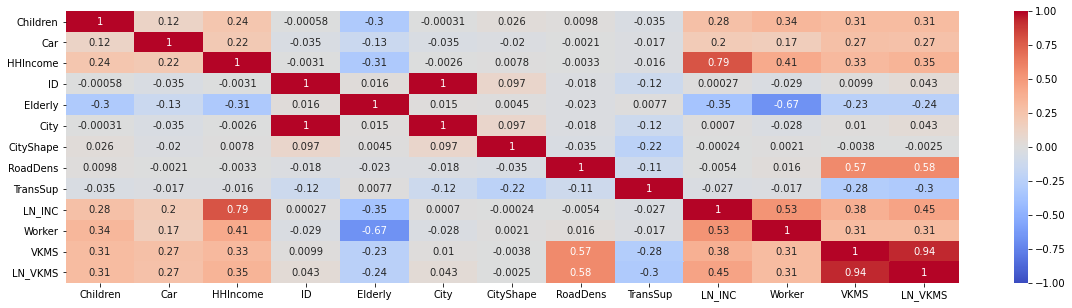

In [53]:
plt.figure(figsize = (20,5))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [36]:
for a in df.columns: ## Frequency table
    print("---- %s ---" % a)
    print(df[a].value_counts())

---- Children ---
0    2632
2     894
1     703
3     301
4      26
5       6
Name: Children, dtype: int64
---- Car ---
1    3437
2    1125
Name: Car, dtype: int64
---- HHIncome ---
508     45
609     41
607     39
608     36
623     35
        ..
1042     1
1584     1
1624     1
1824     1
1971     1
Name: HHIncome, Length: 965, dtype: int64
---- ID ---
2049    1
1242    1
1254    1
3299    1
1250    1
       ..
577     1
4675    1
2628    1
581     1
2047    1
Name: ID, Length: 4562, dtype: int64
---- Elderly ---
0    3920
1     642
Name: Elderly, dtype: int64
---- City ---
19    97
2     96
1     96
25    96
27    95
18    95
14    95
8     95
17    95
4     95
28    94
20    93
48    93
34    93
6     93
38    93
16    93
37    93
26    92
46    92
22    92
36    92
31    92
9     92
5     92
40    92
3     92
50    91
21    91
7     90
44    90
41    90
32    90
11    89
15    89
12    89
45    89
29    89
35    88
23    88
47    88
30    88
49    88
42    87
13    87
39    87
43 

**Discuss the result** from descriptive statistics and correlation matrix


1. *Children*: Mean =0.77, Max = 5.
2. *Car*: Mean = 1.246
3. *Elderly*: Mean = 0.14
4. *HHIncome*: Mean = 620.68 and Max = 10558

### B. Estimate the linear regression using socio-economic variables

In [26]:
model = ols("VKMS ~ Car + C(Elderly) + C(Worker) + Children + HHIncome", df).fit()

In [27]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   VKMS   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 13 Sep 2021   Prob (F-statistic):          1.38e-232
Time:                        14:05:49   Log-Likelihood:                -48901.
No. Observations:                4562   AIC:                         9.781e+04
Df Residuals:                    4556   BIC:                         9.785e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2702.9023    645.789     

**Discuss the result**:

All of the variables have the significant effect except for Elderly variable that is no statistical evidence in average vehical km based on the elderly person in household
1. Increasment in 1 car leads to on average 5386 Vehicle km annually 
2. The average vehical km for working adult in the household is estimated to be 3414 + 2702 = 6116 km whereas only  2702 km if no working adult in household
3. An increase in 1 children leads to on average 2335 vehical km annually 
4. Similarly, increase in 1 unit of household income will increase 6 km increase. 


### C. Estimate the linear regression using socio-economic variables and supply & city varibables

In [38]:
mod= ols(formula = 'VKMS ~ Car + C(Elderly) + C(Worker) + Children + HHIncome + RoadDens + TransSup + CityShape + RoadDens + TransSup + CityShape',data = df)
res = mod.fit()

In [39]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   VKMS   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     782.3
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:25:44   Log-Likelihood:                -47472.
No. Observations:                4562   AIC:                         9.496e+04
Df Residuals:                    4553   BIC:                         9.502e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7142.1580    965.003     

**Discuss the result**:

Similar to Model B, All of the variables have the significant effect except for Elderly variable that is no statistical evidence in average vehical km based on the elderly person in household
1. Increasment in 1 car leads to on average 5353 Vehicle km annually 
2. The average vehical km for working adult in the household is estimated to be 3274 - 7142 = -3868 km whereas only  -7142 km if no working adult in household
3. An increase in 1 children leads to on average 2335 vehical km annually 
4. Similarly, increase in 1 unit of household income will increase 6.7 km increase. 
5. RoadDens: Increase in 1 unit Road Density will cause average 24000 vehical km 
6. TransSup: Incrase in 1 unit Supply of mass transit will decrease -5608 vehical km 
7. CityShape: Increase in 1 unit of City shape (more in cirular shape) will reduce 3016 vehical km 

### D. Compare the model from B and C. 

Elderly variable is not significant in both model;however, since adjusted R-square is higher in model C (0.578 > 0.211), Model C is preferable. 

### E. Calculate elasticity of VKMS with respect to household income and mass transit supply

In [96]:
## Create the new column for Expected value of VKMS based on Model 3
df["exp_VKMS"] = -7142.1580 - 57.0727*df["Elderly"] + 3274.5519 *df["Worker"] + 5353.6099 *df["Car"]+ 2234.2215*df["Children"]+ 6.7285 * df["HHIncome"]+ 24030 *df["RoadDens"] - 5608.7154 *df["TransSup"] - 3016.7246 * df["CityShape"]

In [95]:
## Calculate elasticitty of Income
df['elas_income'] = 6.7285 * df["HHIncome"] / df["exp_VKMS"]

In [92]:
## Calculate elasticitty of Supply of Mass Transit
df['elas_TransSup'] = -5608.7154 * df["TransSup"] / df["exp_VKMS"]

In [89]:
df.head(100)

,Children,Car,HHIncome,ID,Elderly,City,CityShape,RoadDens,TransSup,LN_INC,Worker,VKMS,LN_VKMS,exp_VKMS,elas_income,elas_TransSup
0,0,1,488,1,0,1,0.720210,0.859273,1.13149,6.192362,1,11591.445940,9.358023,16898.961292,0.194302,-0.375538
1,0,1,753,2,0,1,0.720210,0.859273,1.13149,6.625392,1,7841.819340,8.967226,18682.013792,0.271200,-0.339696
2,0,1,623,3,0,1,0.720210,0.859273,1.13149,6.436150,1,10325.076540,9.242331,17807.308792,0.235401,-0.356382
3,2,2,634,4,0,1,0.720210,0.859273,1.13149,6.453625,1,23139.362070,10.049290,27703.375192,0.153984,-0.229077
4,0,2,1039,5,0,1,0.720210,0.859273,1.13149,6.946976,1,12938.279980,9.467946,25959.974692,0.269296,-0.244461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,332,100,0,1,0.720210,0.859273,1.13149,5.808142,0,11774.469950,9.373689,12574.763392,0.177646,-0.504678
96,0,1,831,101,0,2,0.622093,0.544680,1.49269,6.723832,1,8568.704357,9.055872,9917.277837,0.563802,-0.844191
97,0,1,779,102,0,2,0.622093,0.544680,1.49269,6.659294,1,27006.381500,10.203828,9567.395837,0.547850,-0.875063
98,2,1,831,103,0,2,0.622093,0.544680,1.49269,6.723832,1,22168.338190,10.006420,14385.720837,0.388676,-0.581971


In [91]:
df[['elas_income','elas_TransSup']].mean()

elas_income      0.486404
elas_TransSup   -1.028918
dtype: float64

**Discuss the result**:
1. Using the elasticity of 0.48 a 10 % increase in income should lead to a 4.8% increase in Vehicle km
2. Using the elasticity of -1.02 a 10 % increase in income should lead to a 10.2 decrease in Vehicle km

### F. Calculate the effect on the driving with 50% increase in mass transit while 10% income increase

### G. Discuss uncertainties in forecast in F